#This notebook is used for plotting relative fraction of methylated reads on CENP-A vs non-CENP-A reads
#The data in this notebook was copied from DiMeLoseq_in_situ_CENPA_kmer_mA.ipynb

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kde
%matplotlib inline

import math

import pysam
from Bio import SeqIO

from scipy import sparse

from sklearn import cluster, datasets, mixture, decomposition
#Setup the plotting context
#sns.set(color_codes=True)
#sns.set_context("talk")
#sns.set_style("darkgrid")
import scipy.spatial.distance as ssd
from scipy.cluster import hierarchy
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
colorpal = ['#FFBC0A','#053C5E','#559CAD','#610345','#A9E5BB','#2D1E2F','#BB4420','#5E747F']

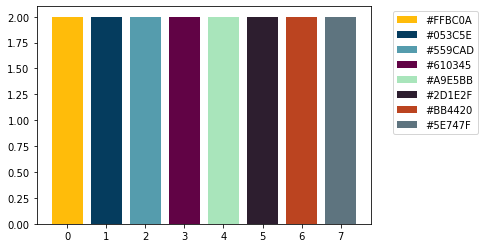

In [3]:
sns.color_palette(colorpal)
for i in range(len(colorpal)):
    plt.bar(i,2,color=colorpal[i], label = colorpal[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
names = ['CENP-A-directed', 'IgG-directed', 'free pA-Hia5', 'untreated' ]
CENPAreads = [0.051195,0.014385,0.052007,0.015494]
NonCENPAreads = [0.007017,0.005864,0.102610,0.005813]

In [28]:
df = pd.DataFrame(data=np.array([CENPAreads, NonCENPAreads]).transpose(), index=names, columns = ['CENPA','NonCENPA'])

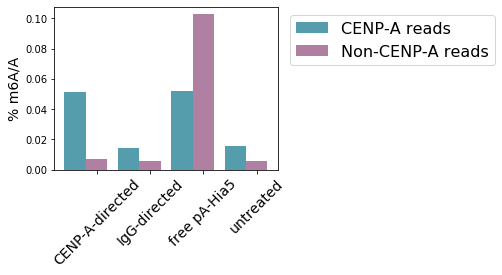

In [29]:
ind = np.arange(4)
width = 0.4
fig=plt.figure(figsize = (4,3))
plt.bar(ind, df['CENPA'], width, color='#559CAD', label = 'CENP-A reads')
plt.bar(ind+width, df['NonCENPA'], width, color='#610345', label = 'Non-CENP-A reads', alpha = 0.5)
plt.xticks(ind+width, (x for x in names), fontsize = 14, rotation = 45)
#plt.xlabel("chromosome", fontsize=24)
plt.ylabel("% m6A/A", fontsize=14)
#plt.yscale("log")
#plt.title('Centromere Live HOR coverage')
#plt.xticks(ind + width / 2, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X', 'Y'),fontsize=24)
#plt.yticks(fontsize=24)
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left')
#plt.show()

#fig.savefig('/home/groups/astraigh/ont_minion/jups/output/kmer_m6A_enrichment.png', dpi = 300, bbox_inches='tight')

In [30]:
ci_lower_CA = [0.050964,0.014259,0.051755,0.015359]
ci_upper_CA = [0.051429,0.014512,0.052260,0.015632]

ci_lower_nonCA = [0.006885,0.005747,0.102175,0.005694]
ci_upper_nonCA = [0.007150,0.005983,0.103048,0.005936]

In [31]:
ci_lower = pd.DataFrame(data=np.array([ci_lower_CA, ci_lower_nonCA]).transpose(), index=names, columns = ['CENPA','NonCENPA'])

In [32]:
ci_upper = pd.DataFrame(data=np.array([ci_upper_CA, ci_upper_nonCA]).transpose(), index=names, columns = ['CENPA','NonCENPA'])

In [33]:
ci_lower

,CENPA,NonCENPA
CENP-A-directed,0.050964,0.006885
IgG-directed,0.014259,0.005747
free pA-Hia5,0.051755,0.102175
untreated,0.015359,0.005694


In [40]:
df['CENPA']

CENP-A-directed    0.051195
IgG-directed       0.014385
free pA-Hia5       0.052007
untreated          0.015494
Name: CENPA, dtype: float64

In [35]:
df - ci_lower

,CENPA,NonCENPA
CENP-A-directed,0.000231,0.000132
IgG-directed,0.000126,0.000117
free pA-Hia5,0.000252,0.000435
untreated,0.000135,0.000119


In [36]:
ci_upper - df

,CENPA,NonCENPA
CENP-A-directed,0.000234,0.000133
IgG-directed,0.000127,0.000119
free pA-Hia5,0.000253,0.000438
untreated,0.000138,0.000123


In [41]:
error_CA_reads = (df['CENPA']-ci_lower['CENPA'], ci_upper['CENPA']-df['CENPA'])
error_CA_reads

(CENP-A-directed    0.000231
 IgG-directed       0.000126
 free pA-Hia5       0.000252
 untreated          0.000135
 Name: CENPA, dtype: float64, CENP-A-directed    0.000234
 IgG-directed       0.000127
 free pA-Hia5       0.000253
 untreated          0.000138
 Name: CENPA, dtype: float64)

In [42]:
error_nonCA_reads = (df['NonCENPA']-ci_lower['NonCENPA'], ci_upper['NonCENPA']-df['NonCENPA'])
error_nonCA_reads

(CENP-A-directed    0.000132
 IgG-directed       0.000117
 free pA-Hia5       0.000435
 untreated          0.000119
 Name: NonCENPA, dtype: float64, CENP-A-directed    0.000133
 IgG-directed       0.000119
 free pA-Hia5       0.000438
 untreated          0.000123
 Name: NonCENPA, dtype: float64)

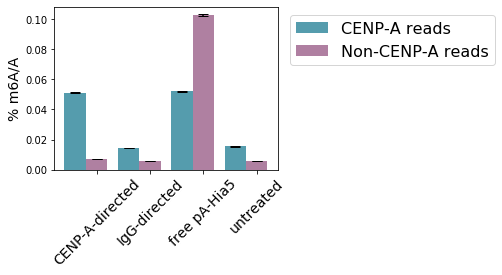

In [51]:
ind = np.arange(4)
width = 0.4
fig=plt.figure(figsize = (4,3))
plt.bar(ind, df['CENPA'], width,yerr = error_CA_reads, color='#559CAD', label = 'CENP-A reads',ecolor='black', capsize=5)

plt.bar(ind+width, df['NonCENPA'], width,yerr = error_nonCA_reads, color='#610345', label = 'Non-CENP-A reads', alpha = 0.5,ecolor='black', capsize=5)


plt.xticks(ind+width, (x for x in names), fontsize = 14, rotation = 45)
#plt.xlabel("chromosome", fontsize=24)
plt.ylabel("% m6A/A", fontsize=14)
#plt.yscale("log")
#plt.title('Centromere Live HOR coverage')
#plt.xticks(ind + width / 2, ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','X', 'Y'),fontsize=24)
#plt.yticks(fontsize=24)
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1), loc='upper left')
#plt.show()

fig.savefig('/home/groups/astraigh/ont_minion/jups/output/kmer_m6A_enrichment_with_ci.png', dpi = 300, bbox_inches='tight')